<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

plt.style.use('fivethirtyeight')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [30]:
# create empty list for the data to be transferred into.
rows = []
# open files in a way that allows it to be converted into its rows
with open('./sat_scores.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

#separate out the categories so that they can become the keys (header) and the data        
header = rows[0]
data = rows[1:]

#Now prepare the dictionary
sat_data = {}

#A for loop to make the header list become the keys for each appropriate data list.
for index, column_name in enumerate(header):
    sat_data[column_name] = []
    for row in data:
        sat_data[column_name].append(row[index])

In [31]:
sat_data

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

## First I've taken the available data and tranferred it into a Dictionary so as to better manipulate the data using Python coding.

## Here I have taken that Dictionary and converted it into a Pandas DataFrame, allowing me more opportunities and capabilities to explore what this data contains with ease.

In [32]:
satsdf = pd.DataFrame(sat_data)
satsdf

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


# This is another way of achieving the same result, but without first having to turn the data into a Dictionary. Direct using Pandas.

In [33]:
sats = pd.read_csv('./sat_scores.csv')
sats

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [34]:
satsdf.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [35]:
sats.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

# Comparing these two ways of creating a DataFrame, we can see that not only was the second way faster and easier, it has also recognised all the number values as integers and stored them as such. Whereas the first way has them stored as strings still. Thus they would still need to be converted before proper analysis could be done on them.

In [36]:
sats.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


Here we have a representation of the first 10 entries for each State that provided data for each of our categories: Rate, Verbal and Math.

Straight away it can be seen that each State is abbreviated to only two letters each, however this is the only column that is an object rather than int values.
And comparing each category, Rate has much lower values than both Verbal and Math, thus making it impractical to directly compare Rate against either of the other variables, as I will highlight later.

From here on I have reloaded the file, with one adjustment: I have set the states from now on as the Index for each Row, this makes doing data comparison further in easier.

In [37]:
sats = pd.read_csv('./sat_scores.csv', index_col = 0)
sats

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516
RI,71,501,499
PA,71,500,499
VT,69,511,506
ME,69,506,500


In [38]:
sats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, CT to All
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rate    52 non-null     int64
 1   Verbal  52 non-null     int64
 2   Math    52 non-null     int64
dtypes: int64(3)
memory usage: 1.6+ KB


# I have noticed a row at the bottom that averages all columns. I have chosen to remove this in case it changes my results.

However I will refer back to it to confirm my results later.

In [39]:
sats.drop(index='All',inplace=True)
sats

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516
RI,71,501,499
PA,71,500,499
VT,69,511,506
ME,69,506,500


# DON'T FORGET THE DATA DICTIONARY!

### State: (str, object)
The abbreviation of each State that has provided the data 

### Rate: (int64)
Some data. Related to the SAT scores, although this is unclear.

### Verbal: (int64)
The average SAT score achieved in each State in Verbal grading. 

### Math: (int64)
The average SAT score achieved in each State in Mathematics grading. 

### Data_Shape: (52,4)
we have 52 counts of data for each of the 4 categories. 



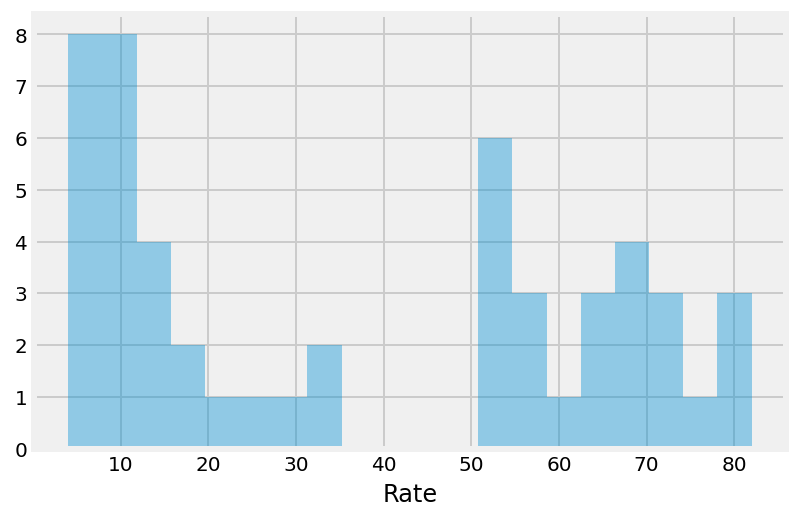

In [40]:
sns.distplot(sats['Rate'],bins = 20, kde = False)

The first graph is a histogram showing the spread across States of 'Rate'. It has to poles. One at a low score around 10, and another around the middle at 50.

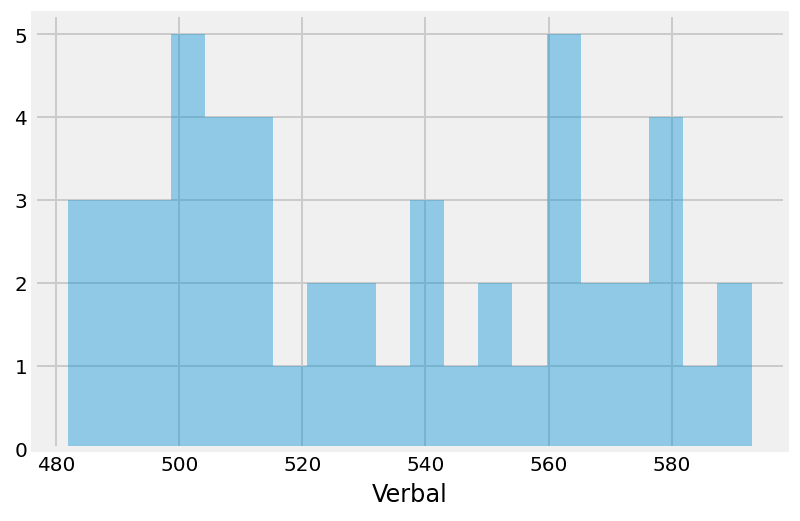

In [41]:
sns.distplot(sats['Verbal'],bins = 20, kde = False)

The second graph shows the spread of Verbal scores across States. This has a majority positive skew, at first glance, most scores achieved across states where around 500-510

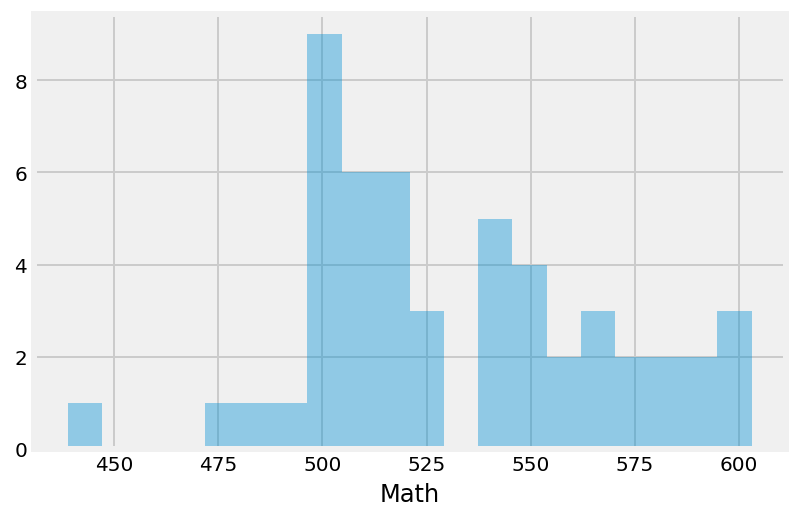

In [42]:
sns.distplot(sats['Math'],bins = 20, kde = False)

The third graph shows the spread of Math scores across States. The graph shows a relatively normal distribution in comparison to the other two scores. With majority being around 500.

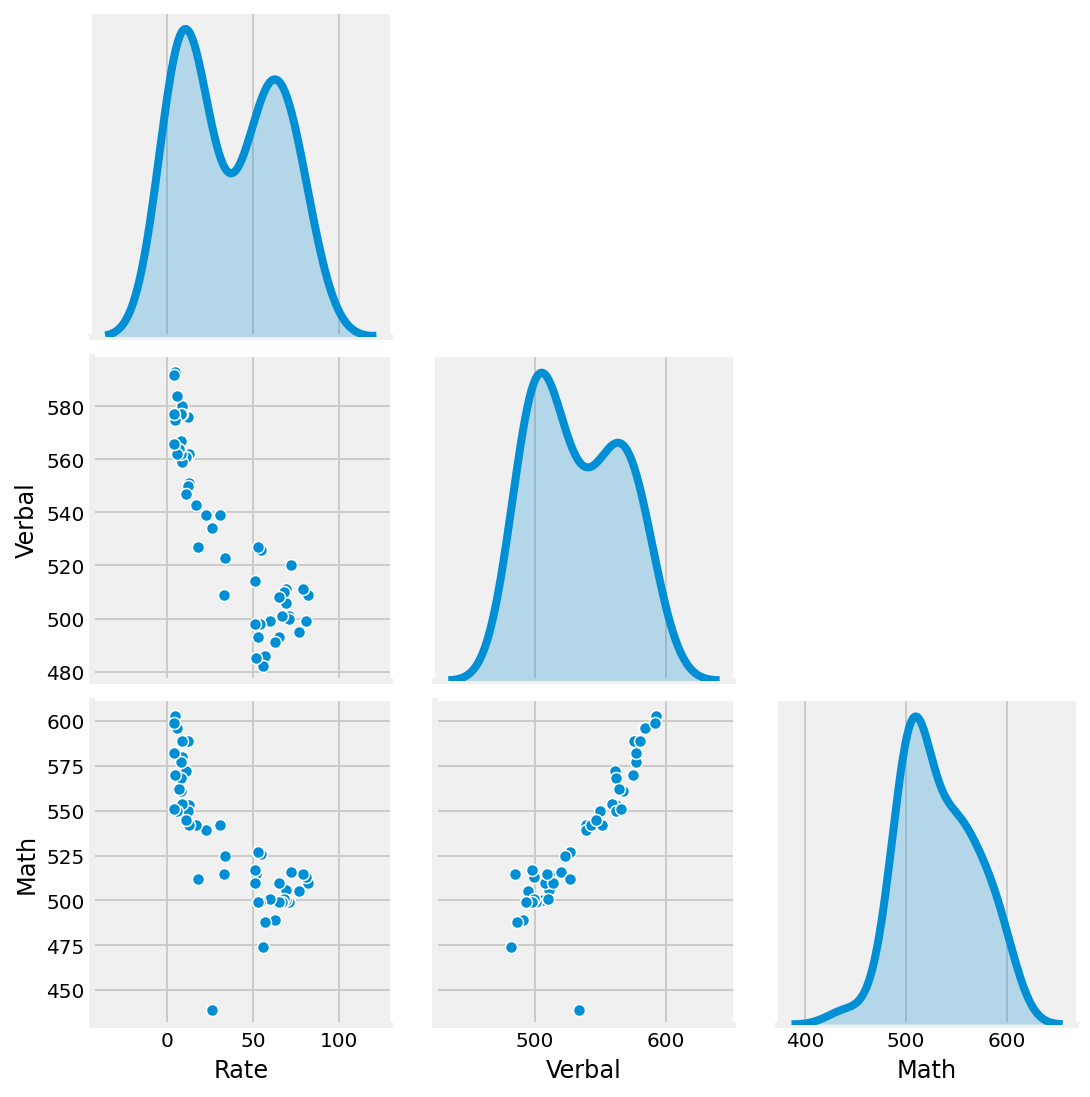

In [43]:
sns.pairplot(sats, diag_kind='kde', corner=True)

These six graphs show each column paired against one another and reveal the correlation each has to one another, the three along the top diagonal are another representation of the three graphs viewed before.

Both Verbal and Math have similar correlation values towards Rate Both showing that the higher the Rate, the lower the scores for both the other scores.

Verbal against Math shows that the higher a score in one category is likely to lead to a higher score in the other category. There is a strong correlation between these two.

#### At this stage these are all observations made by the shape of the graph, lets look into some more graphs to help visualise more relations and later we can see some equations to confirm these observations.

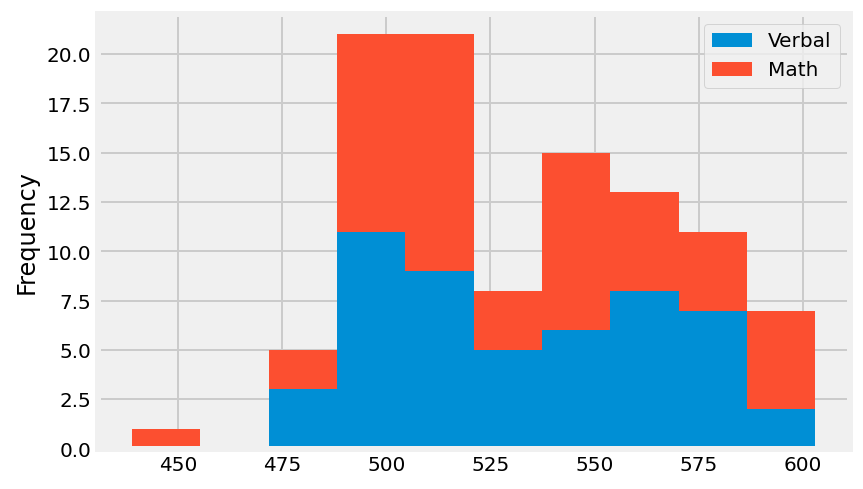

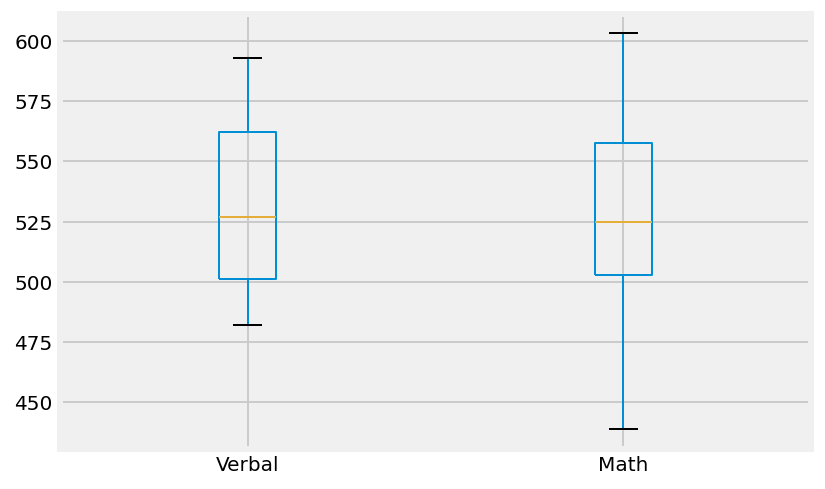

In [44]:
sats[['Verbal','Math']].plot.hist(stacked=True)
sats[['Verbal', 'Math']].plot.box()

Here we are comparing Verbal and Math scores together, through both a stacked Histogram and boxplots.

Together, it can be seen that the majority of scores for both is around 500 up to 525, with very little below 475.

The box plot reveals that Maths has a larger range of scores to Verbal, Verbal averaging higher than Maths but overall the two are largely equally spread. 

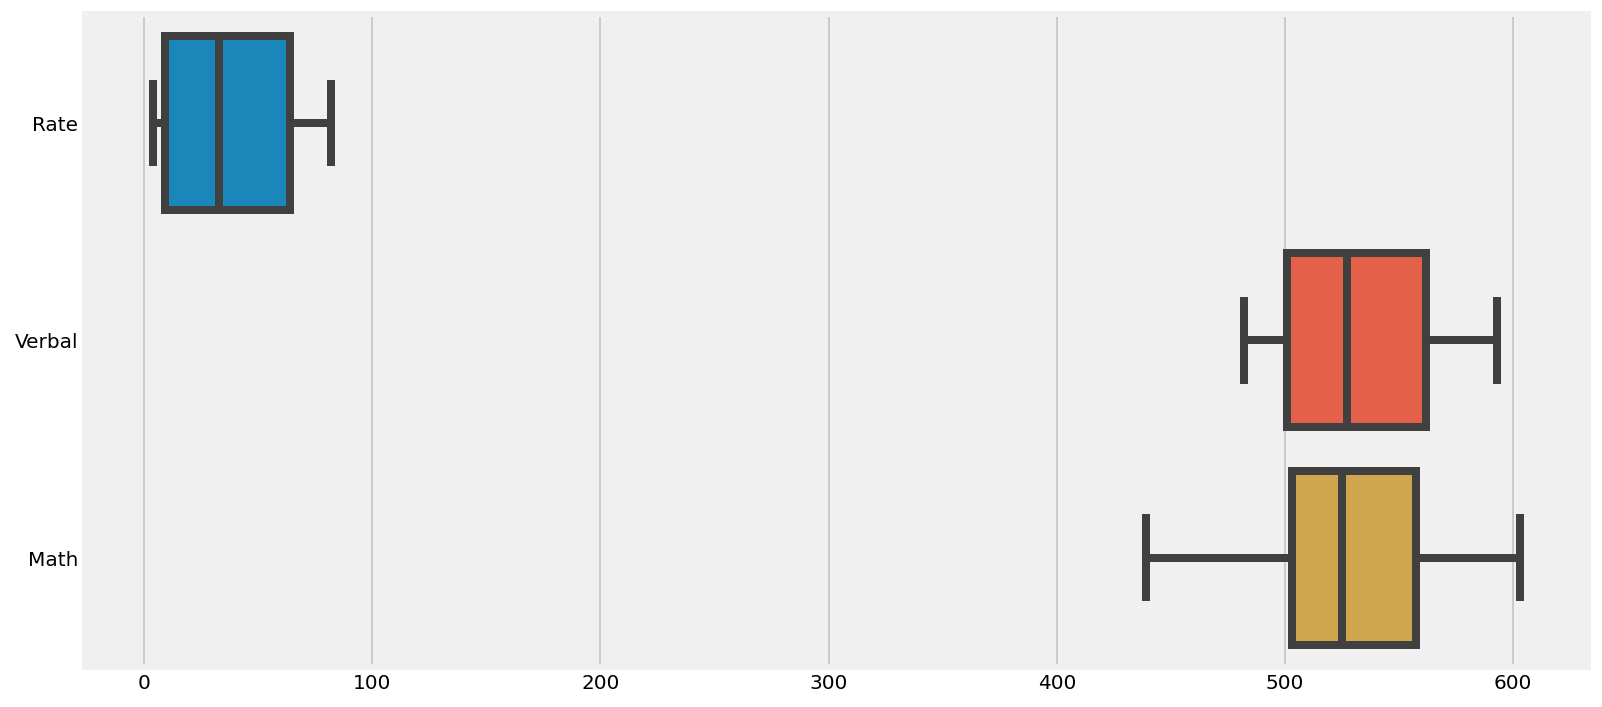

In [45]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
ax = sns.boxplot(data = sats, orient = 'h', notch = False)
plt.show()

As seen here, Rate does not match well on a Box Plot against Verbal and Math, so in order to create a comparison for these three, first they will need to be standardized.

In [46]:
sats_std = (sats - sats.mean())/sats.std()

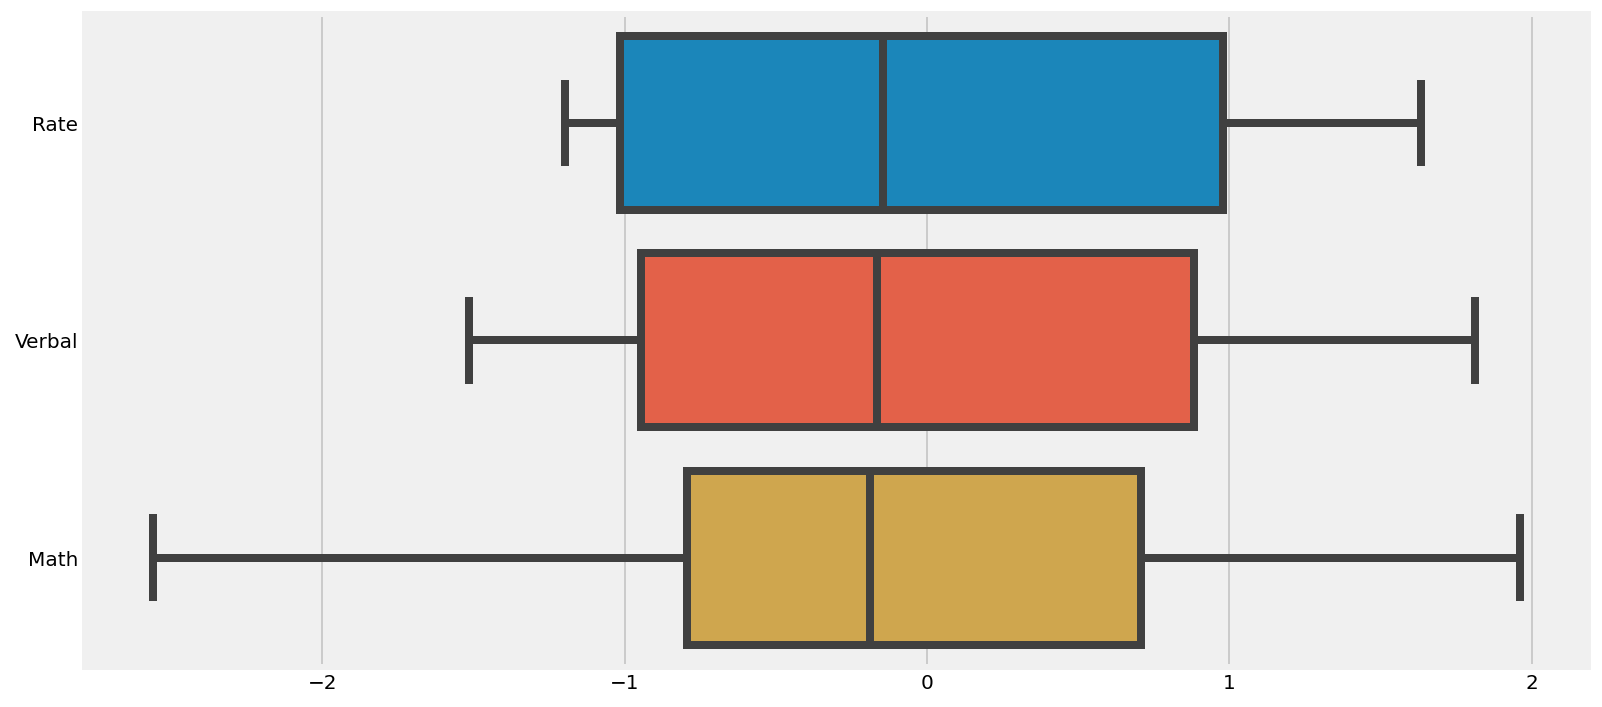

In [47]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
ax = sns.boxplot(data = sats_std, orient = 'h', notch = False)
plt.show()

Now that they all have been averaged and standardized, Rate can be compared to Verbal and Math for as much as their spread.

It can be seen that as before, Math has the largest overall range. However the Inter-Quartile Range of Rate is larger than both Verbal and Math.

All three have Medians lower than their averages.

In [48]:
Verb_Above_Mean = sats.loc[sats.Verbal > sats['Verbal'].mean()]
print(sats['Verbal'].mean())
print(Verb_Above_Mean.shape)
Verb_Above_Mean

532.5294117647059
(24, 3)


,Rate,Verbal,Math
State,,,
CO,31,539,542
OH,26,534,439
MT,23,539,539
ID,17,543,542
TN,13,562,553
NM,13,551,542
IL,12,576,589
KY,12,550,550
WY,11,547,545


There are 24 States that have a Verbal score above the mean across all States
It is interesting, that the score that was given in the original table was of 506 for Verbal All, yet the mean score calculated here is 532.5

So what is "All" representing? 
##### All	45	506	514

In [49]:
Verb_Above_Median = sats[sats.Verbal>sats['Verbal'].median()]
print(sats['Verbal'].median())
print(Verb_Above_Median.shape)
Verb_Above_Median

527.0
(24, 3)


,Rate,Verbal,Math
State,,,
CO,31,539,542
OH,26,534,439
MT,23,539,539
ID,17,543,542
TN,13,562,553
NM,13,551,542
IL,12,576,589
KY,12,550,550
WY,11,547,545


The Median Verbal score for all States is only slightly lower than that of the Mean Verbal Score. Meaning the same number (24) of States are represented.

This suggests that the spread of scores across States has a normal spread around the median and mean scores.

Next I want to compare the Scores of Verbal and Math for each State, what is the difference between these two Scores? Is it significant?

In [50]:
sats2 = sats.copy()

In [51]:
sats2['V-M']=sats2['Verbal'].sub(sats2['Math'])
sats2

,Rate,Verbal,Math,V-M
State,,,,
CT,82,509,510,-1
NJ,81,499,513,-14
MA,79,511,515,-4
NY,77,495,505,-10
NH,72,520,516,4
RI,71,501,499,2
PA,71,500,499,1
VT,69,511,506,5
ME,69,506,500,6


Here it can be seen that the majority of States have little difference between Verbal and Math scores within their own State, with the biggest difference being 95.

In [52]:
Verb = sats2.sort_values('V-M',ascending=False).head(10)
Math = sats2.sort_values('V-M',ascending=True).head(10)
Verb.head(3)

,Rate,Verbal,Math,V-M
State,,,,
OH,26,534,439,95
MS,4,566,551,15
WV,18,527,512,15


In [53]:
Math.head(3)

,Rate,Verbal,Math,V-M
State,,,,
HI,52,485,515,-30
CA,51,498,517,-19
NJ,81,499,513,-14


These two sets of data give us the top three States that have the largest difference between Scores. The three that have the largest difference with Verbal being the higher scoring, and the top three with Math as the higher score.

## Now let's move on to some more Data Analysis.

In [54]:
sats

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516
RI,71,501,499
PA,71,500,499
VT,69,511,506
ME,69,506,500


In [55]:
save = sats.corr()
save

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


This Correlation matrix tells of a strong correlation between all three datasets. The strongest correlation is the positive relation between Verbal and Math, while Rate has a strong negative correlation with both Verbal and Math.

In [56]:
sats.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


Here we have a summary of many useful things within data analysis:

count: This indicates the number of data entries with valid values. E.G. not NaN

mean: This is the average value for each category as measured by the sum of each divided by the count.

std: This is the Standard Deviation calculated for each Category. This helps us to estimate how far from the mean of our data the majority of our data falls within.

min: This is the smallest data value provided within each category.

25%: This is the value that is at the 25th percentile of each category. Meaning that from the minimum to this value holds 25% of all value entries for this column.

50%: Similar to the 25th percentile, this shows the half way point to our data entries. The boundary between the 2nd and 3rd Quartile.

75%: Similat to the 25th percentile, this is the marker for the top 25% of the data.

max: The largest value found within each category.

# Have not done 6.3: Assign and print covariance matrix
1. Describe the difference between covariance and correlation
2. what is the process to convert
3. Why is correlation preferred to covariance for examining relationships in the data?

# END OF SAT SCORES #

Now to move onto a new Data Set, this time we are looking at a dataset labelled "drug use by age"

In [2]:
drugs = pd.read_csv('./drug-use-by-age.csv',index_col = 0)
drugs

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


Initial Observations: This dataset starts with 17 Rows and 28 Columns, one Column I have set as the Index(Age) as this will be my comparison basis for my study. All of the data is said to be recorded over the same 12 month period, so I will assume this is correct and accurate. Every second row is a percentage value, given as a decimal. So I should expect to find no value higher than 100 in these Columns.
The other half are given as the Median value for each corresponding age group.

# Data Dictionary: 
## Header Definition: 
#### alcohol-use: 
Percentage of those in an age group who used alcohol in the past 12 months
#### alcohol-frequency: 
Median number of times a user in an age group used alcohol in the past 12 months 
#### marijuana-use:
Percentage of those in an age group who used marijuana in the past 12 months 
#### marijuana-frequency: 
Median number of times a user in an age group used marijuana in the past 12 months 
#### cocaine-use: 
Percentage of those in an age group who used cocaine in the past 12 months 
#### cocaine-frequency: 
Median number of times a user in an age group used cocaine in the past 12 months 
#### crack-use: 
Percentage of those in an age group who used crack in the past 12 months 
#### crack-frequency: 
Median number of times a user in an age group used crack in the past 12 months 
#### heroin-use: 
Percentage of those in an age group who used heroin in the past 12 months 
#### heroin-frequency: 
Median number of times a user in an age group used heroin in the past 12 months 
#### hallucinogen-use: 
Percentage of those in an age group who used hallucinogens in the past 12 months 
#### hallucinogen-frequency: 
Median number of times a user in an age group used hallucinogens in the past 12 months 
#### inhalant-use: 
Percentage of those in an age group who used inhalants in the past 12 months 
#### inhalant-frequency: 
Median number of times a user in an age group used inhalants in the past 12 months 
#### pain-releiver-use: 
Percentage of those in an age group who used pain relievers in the past 12 months 
#### pain-releiver-frequency: 
Median number of times a user in an age group used pain relievers in the past 12 months 
#### oxycontin-use: 
Percentage of those in an age group who used oxycontin in the past 12 months 
#### oxycontin-frequency: 
Median number of times a user in an age group used oxycontin in the past 12 months 
#### tranquilizer-use: 
Percentage of those in an age group who used tranquilizer in the past 12 months 
#### tranquilizer-frequency: 
Median number of times a user in an age group used tranquilizer in the past 12 months 
#### stimulant-use: 
Percentage of those in an age group who used stimulants in the past 12 months 
#### stimulant-frequency: 
Median number of times a user in an age group used stimulants in the past 12 months 
#### meth-use: 
Percentage of those in an age group who used meth in the past 12 months 
#### meth-frequency: 
Median number of times a user in an age group used meth in the past 12 months 
#### sedative-use: 
Percentage of those in an age group who used sedatives in the past 12 months 
#### sedative-frequency: 
Median number of times a user in an age group used sedatives in the past 12 months

After going through each of these category names, some adjustment should be made to them to make data analysis easier. E.G. changing the '-' to underscore makes calling the column name easier.

In [3]:
drugs.rename(columns={
        'n':'n',
        'alcohol-use':'alcohol_use',
        'alcohol-frequency':'alcohol_frequency',
        'marijuana-use':'marijuana_use',
        'marijuana-frequency':'marijuana_frequency',
        'cocaine-use':'cocaine_use',
        'cocaine-frequency':'cocaine_frequency',
        'crack-use':'crack_use',
        'crack-frequency':'crack_frequency',
        'heroin-use':'heroin_use',
        'heroin-frequency':'heroin_frequency',
        'hallucinogen-use':'hallucinogen_use',
        'hallucinogen-frequency':'hallucinogen_frequency',
        'inhalant-use':'inhalant_use',
        'inhalant-frequency':'inhalant_frequency',
        'pain-releiver-use':'pain_releiver_use',
        'pain-releiver-frequency':'pain_releiver_frequency',
        'oxycontin-use':'oxycontin_use',
        'oxycontin-frequency':'oxycontin_frequency',
        'tranquilizer-use':'tranquilizer_use',
        'tranquilizer-frequency':'tranquilizer_frequency',
        'stimulant-use':'stimulant_use',
        'stimulant-frequency':'stimulant_frequency',
        'meth-use':'meth_use',
        'meth-frequency':'meth_frequency',
        'sedative-use':'sedative_use',
        'sedative-frequency':'sedative_frequency', 
    }, inplace=True)
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 12 to 65+
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n                        17 non-null     int64  
 1   alcohol_use              17 non-null     float64
 2   alcohol_frequency        17 non-null     float64
 3   marijuana_use            17 non-null     float64
 4   marijuana_frequency      17 non-null     float64
 5   cocaine_use              17 non-null     float64
 6   cocaine_frequency        17 non-null     object 
 7   crack_use                17 non-null     float64
 8   crack_frequency          17 non-null     object 
 9   heroin_use               17 non-null     float64
 10  heroin_frequency         17 non-null     object 
 11  hallucinogen_use         17 non-null     float64
 12  hallucinogen_frequency   17 non-null     float64
 13  inhalant_use             17 non-null     float64
 14  inhalant_frequency       17 non

Looking at the Data Types for each Column, most are Float, however there are some that are Object types. Looking at one of these columns we can find out why it is different to others.

In [59]:
# contains a '-' data that makes the array an object data type.
drugs.cocaine_frequency.unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

From this example it can be seen that the data has been given a - to indicate no value. This will need to be changed for the data to be used properly.

In [4]:
drugs.cocaine_frequency = drugs.cocaine_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.crack_frequency = drugs.crack_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.heroin_frequency = drugs.heroin_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.inhalant_frequency = drugs.inhalant_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.oxycontin_frequency = drugs.oxycontin_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs.meth_frequency = drugs.meth_frequency.map(lambda x: np.nan if x == '-' else float(x))
drugs

,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [61]:
#Check that everything is float now.
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 12 to 65+
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n                        17 non-null     int64  
 1   alcohol_use              17 non-null     float64
 2   alcohol_frequency        17 non-null     float64
 3   marijuana_use            17 non-null     float64
 4   marijuana_frequency      17 non-null     float64
 5   cocaine_use              17 non-null     float64
 6   cocaine_frequency        16 non-null     float64
 7   crack_use                17 non-null     float64
 8   crack_frequency          14 non-null     float64
 9   heroin_use               17 non-null     float64
 10  heroin_frequency         16 non-null     float64
 11  hallucinogen_use         17 non-null     float64
 12  hallucinogen_frequency   17 non-null     float64
 13  inhalant_use             17 non-null     float64
 14  inhalant_frequency       16 non

This has cleared up all of the object types in the data and now I can be confident that the data will work in my analysis.

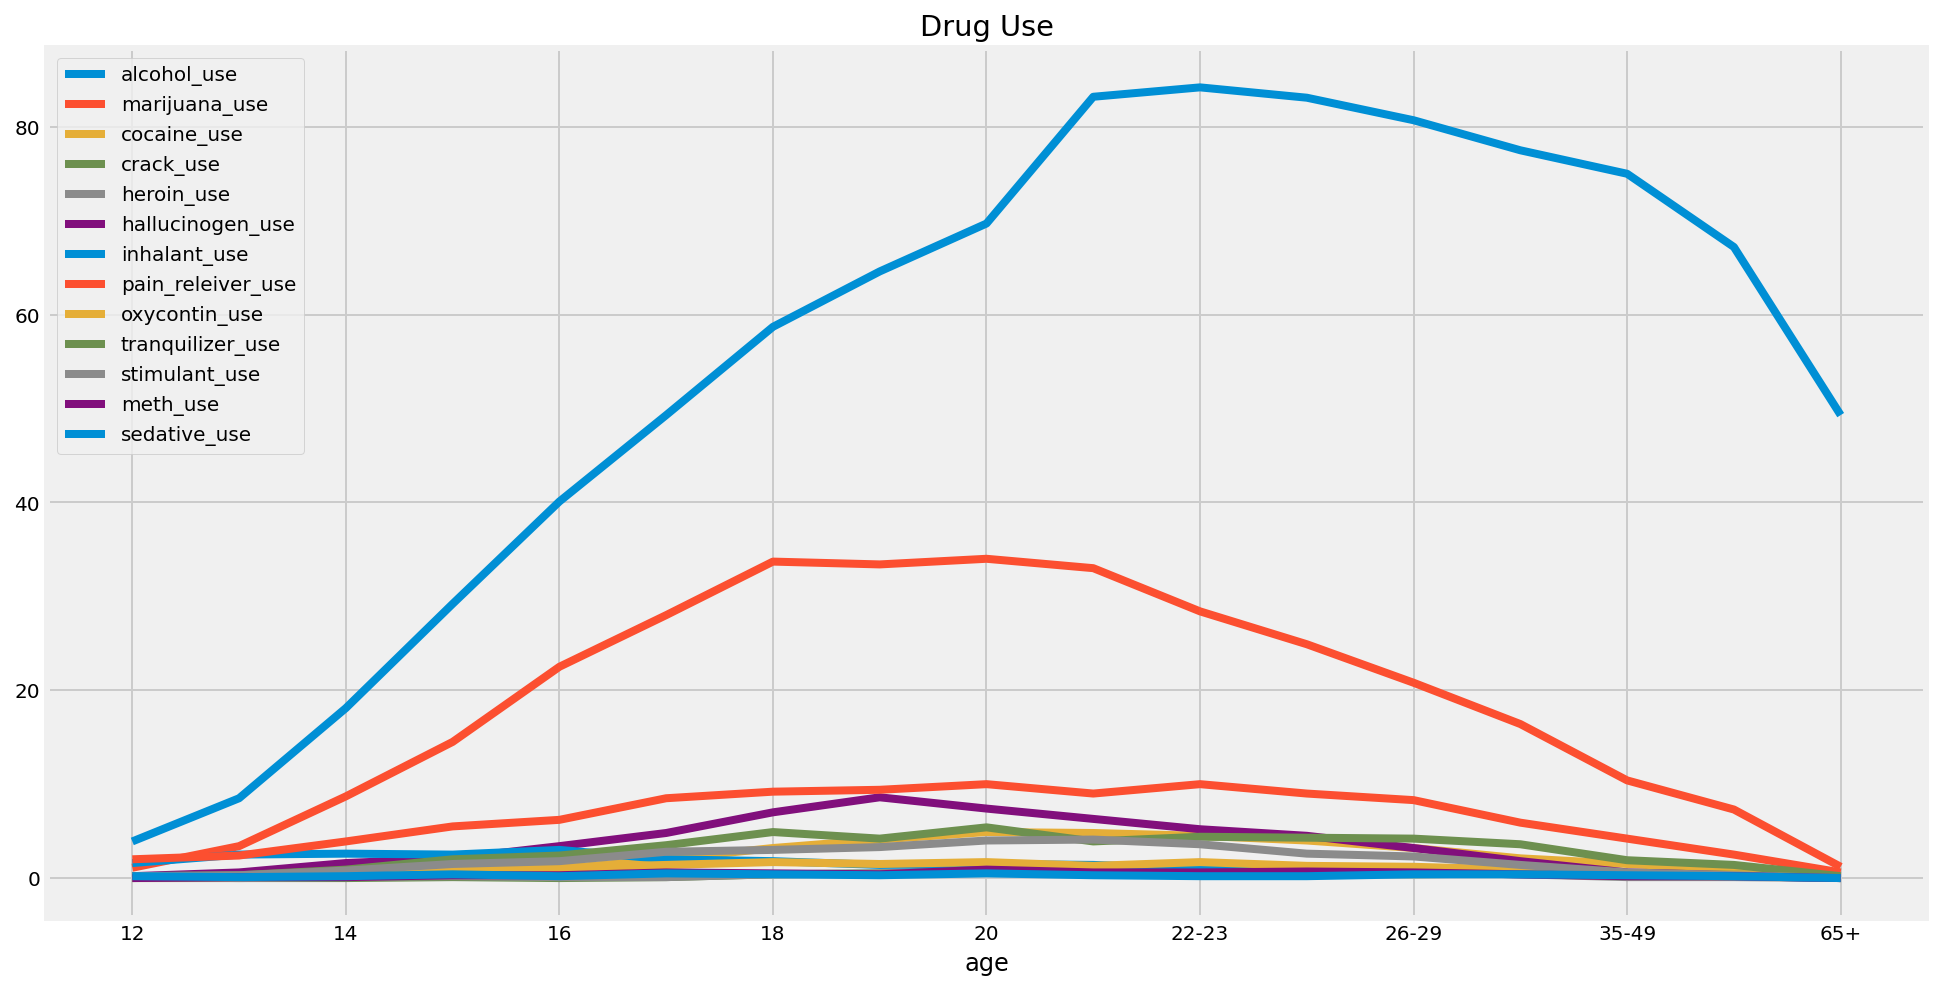

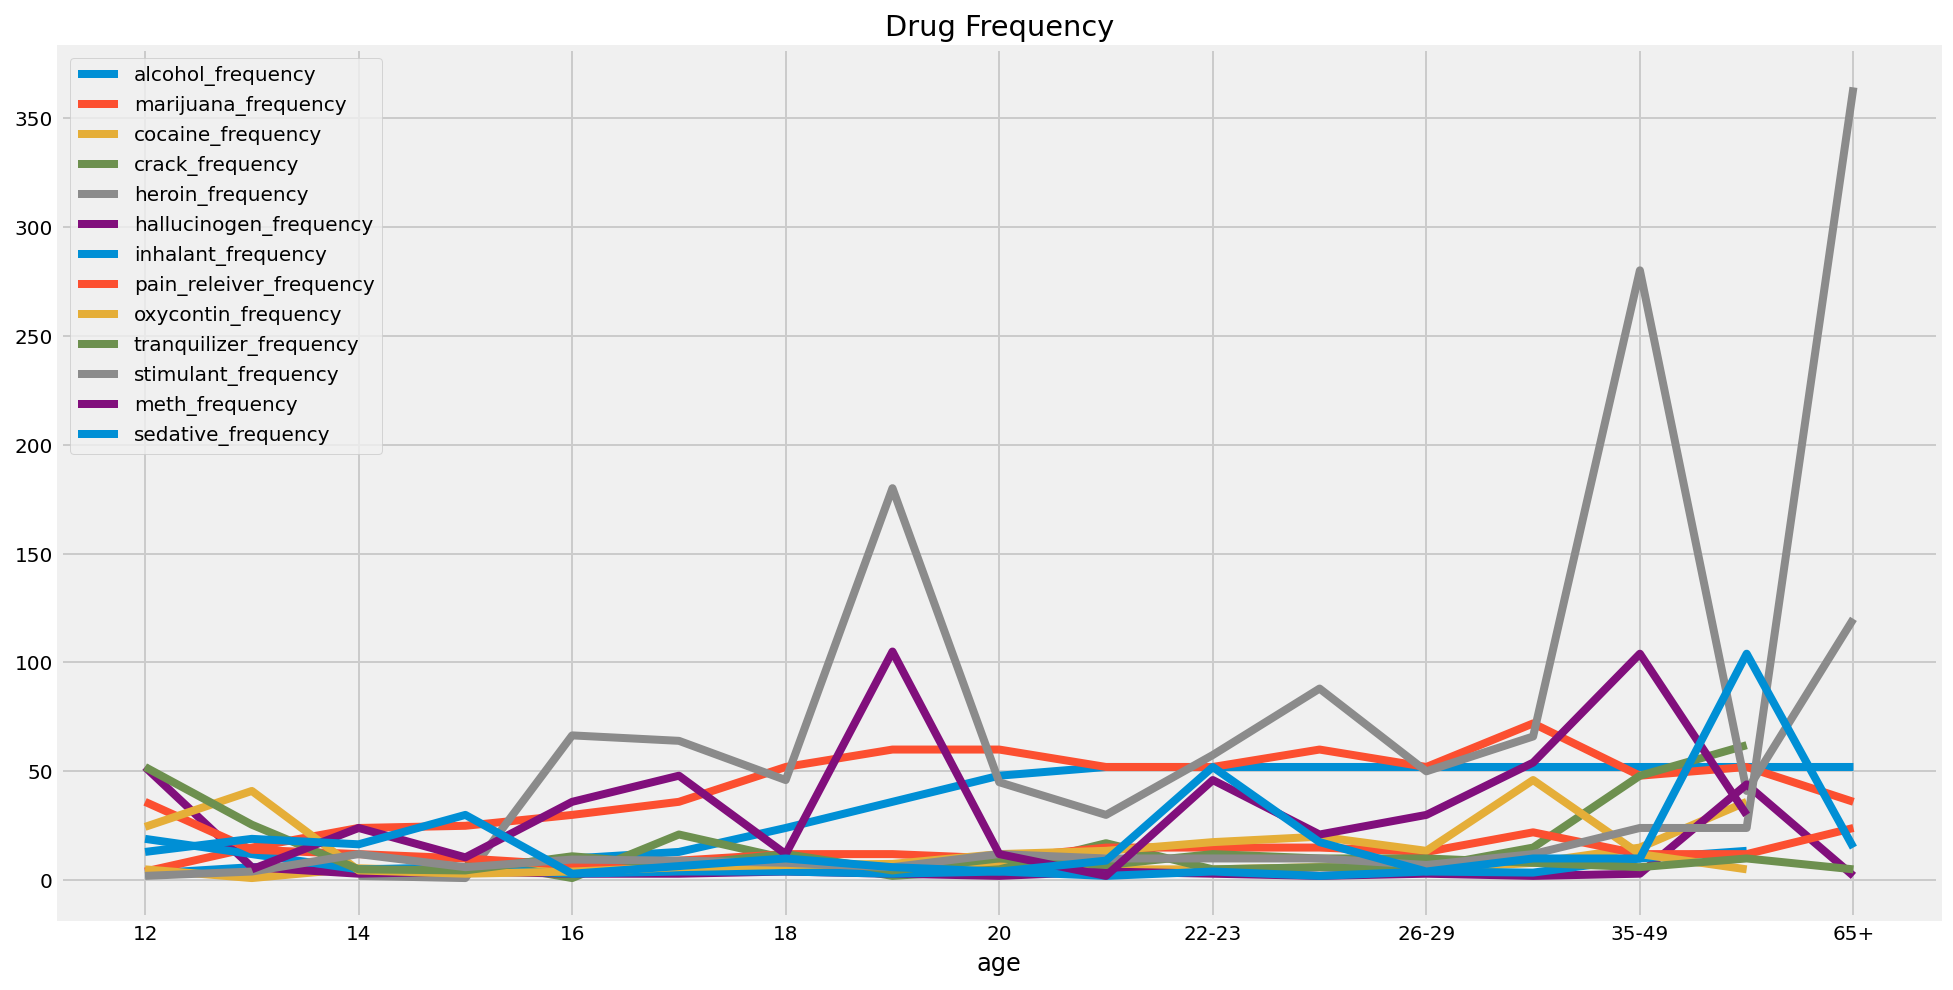

In [5]:
duse = drugs[['alcohol_use','marijuana_use','cocaine_use','crack_use','heroin_use','hallucinogen_use','inhalant_use','pain_releiver_use','oxycontin_use','tranquilizer_use','stimulant_use','meth_use','sedative_use']]
dfreq = drugs[['alcohol_frequency','marijuana_frequency','cocaine_frequency','crack_frequency','heroin_frequency','hallucinogen_frequency','inhalant_frequency','pain_releiver_frequency','oxycontin_frequency','tranquilizer_frequency','stimulant_frequency','meth_frequency','sedative_frequency']]
duse.plot(title='Drug Use',figsize=(15,8))
dfreq.plot(figsize=(15,8),title='Drug Frequency')

First thing I have done is separated the 'use' and 'frequency' columns into separate DataFrames because I believe use and frequency were not suitable to compare on the same axis, They could be compared on separate axis however.

The graphs above show a basic comparison for the similar data types.
It is clear with these graphs that Alcohol use is far in excess for percentage compared to all other Drugs.

It also appears that Heroin and Meth spike at age 19. This may be an error in the data, or be some sort of indicator of these drugs being appealing to this age bracket.

In [63]:
duse

,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,hallucinogen_use,inhalant_use,pain_releiver_use,oxycontin_use,tranquilizer_use,stimulant_use,meth_use,sedative_use
age,,,,,,,,,,,,,
12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
17,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
18,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
19,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
20,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5


In [64]:
duse.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol_use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
marijuana_use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
cocaine_use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack_use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin_use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen_use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
inhalant_use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0
pain_releiver_use,17.0,6.270588,3.166379,0.6,3.9,6.2,9.0,10.0
oxycontin_use,17.0,0.935294,0.608216,0.0,0.4,1.1,1.4,1.7
tranquilizer_use,17.0,2.805882,1.753379,0.2,1.4,3.5,4.2,5.4


Alcohol is the only drug in this collected data that has a mean above 50%.

In [65]:
dfreq

,alcohol_frequency,marijuana_frequency,cocaine_frequency,crack_frequency,heroin_frequency,hallucinogen_frequency,inhalant_frequency,pain_releiver_frequency,oxycontin_frequency,tranquilizer_frequency,stimulant_frequency,meth_frequency,sedative_frequency
age,,,,,,,,,,,,,
12,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
13,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
14,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
15,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
16,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0
17,13.0,36.0,5.0,21.0,64.0,3.0,4.0,9.0,6.0,7.0,9.0,48.0,6.5
18,24.0,52.0,5.0,10.0,46.0,4.0,4.0,12.0,7.0,12.0,8.0,12.0,10.0
19,36.0,60.0,5.5,2.0,180.0,3.0,3.0,12.0,7.5,4.5,6.0,105.0,6.0
20,48.0,60.0,8.0,5.0,45.0,2.0,4.0,10.0,12.0,10.0,12.0,12.0,4.0


In [66]:
dfreq.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol_frequency,17.0,33.352941,21.318833,3.0,10.000,48.00,52.000,52.0
marijuana_frequency,17.0,42.941176,18.362566,4.0,30.000,52.00,52.000,72.0
cocaine_frequency,16.0,7.875000,8.038449,1.0,5.000,5.25,7.250,36.0
crack_frequency,14.0,15.035714,18.111263,1.0,5.000,7.75,16.500,62.0
heroin_frequency,16.0,73.281250,70.090173,1.0,39.625,53.75,71.875,280.0
hallucinogen_frequency,17.0,8.411765,15.000245,2.0,3.000,3.00,4.000,52.0
inhalant_frequency,16.0,6.156250,4.860448,2.0,3.375,4.00,6.625,19.0
pain_releiver_frequency,17.0,14.705882,6.935098,7.0,12.000,12.00,15.000,36.0
oxycontin_frequency,16.0,14.812500,12.798275,3.0,5.750,12.00,18.125,46.0
tranquilizer_frequency,17.0,11.735294,11.485205,4.5,6.000,10.00,11.000,52.0


Some of the frequency data is incomplete, these were the columns that had NaN values.

For some of the values to have frequencies that are so high (heroin, stimulant, meth) compared to other drugs suggests that these drugs require more consistent usage than others.

It may be worth my time to standardise these data sets.

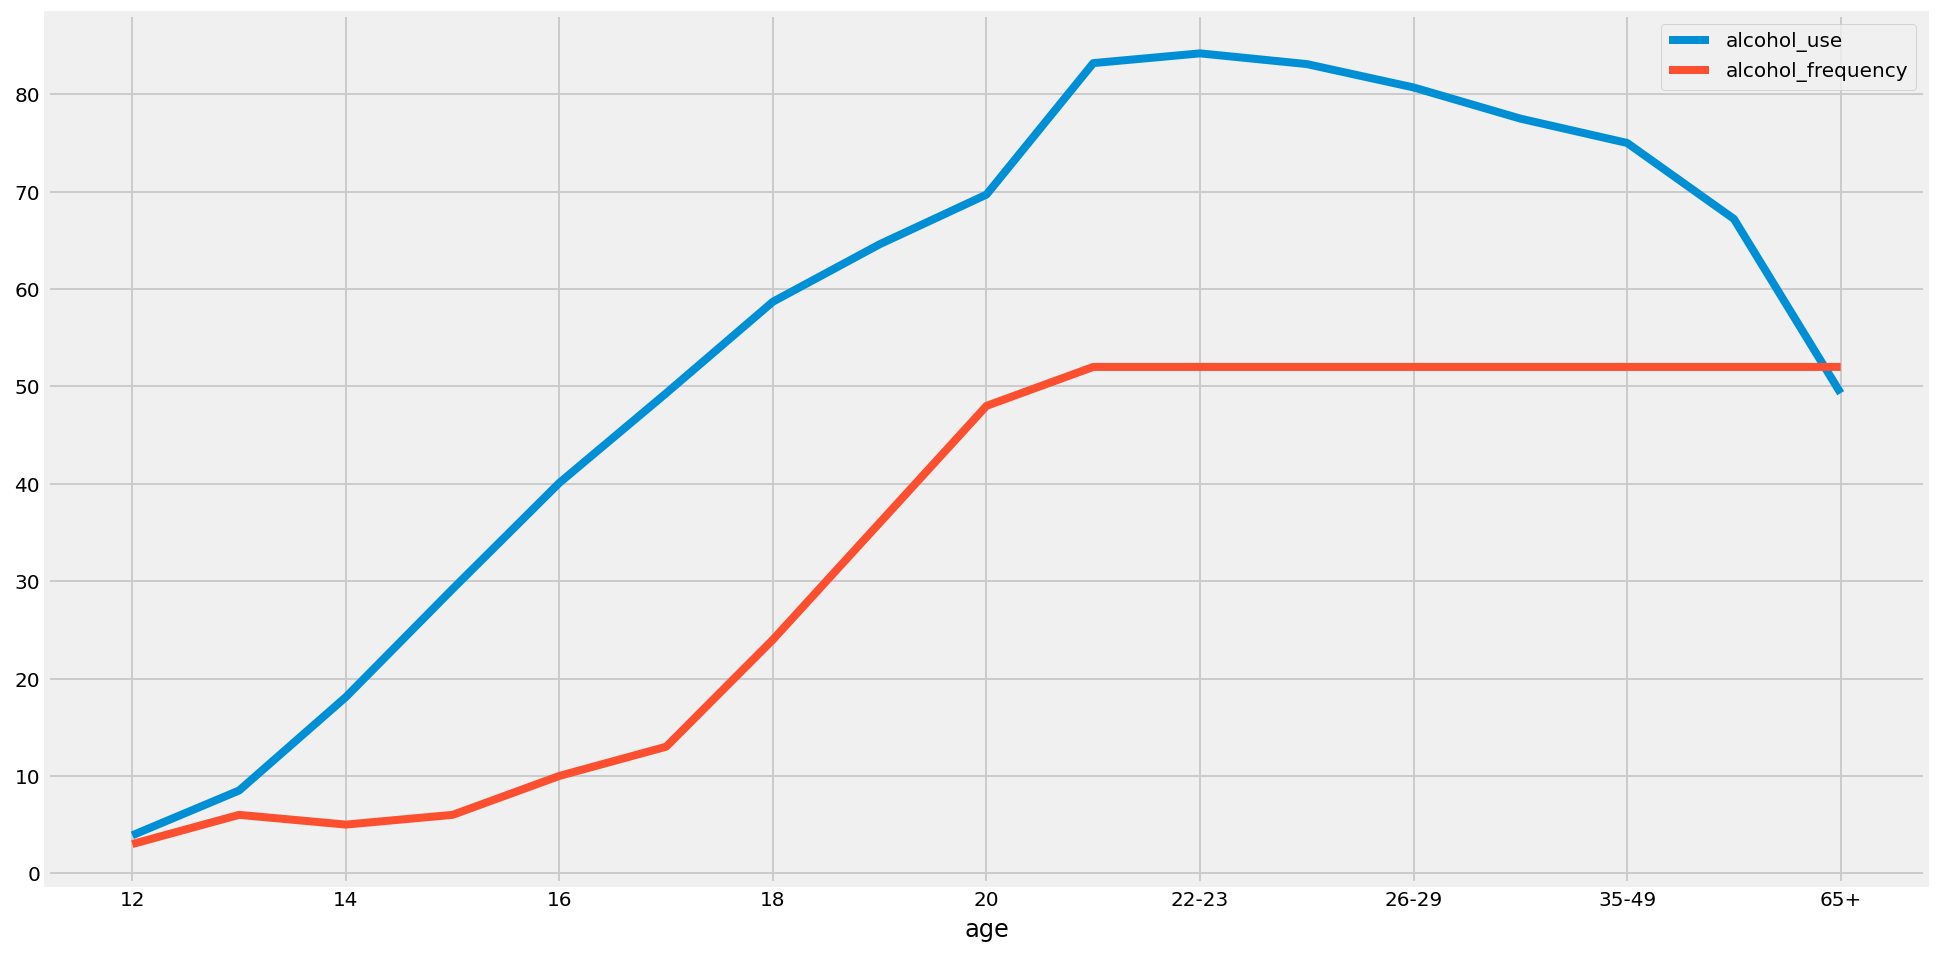

In [67]:
drugs[['alcohol_use','alcohol_frequency']].plot(figsize=(15,8))

This graph shows that little information can be gained by comparing a drugs use against a drugs frequency.

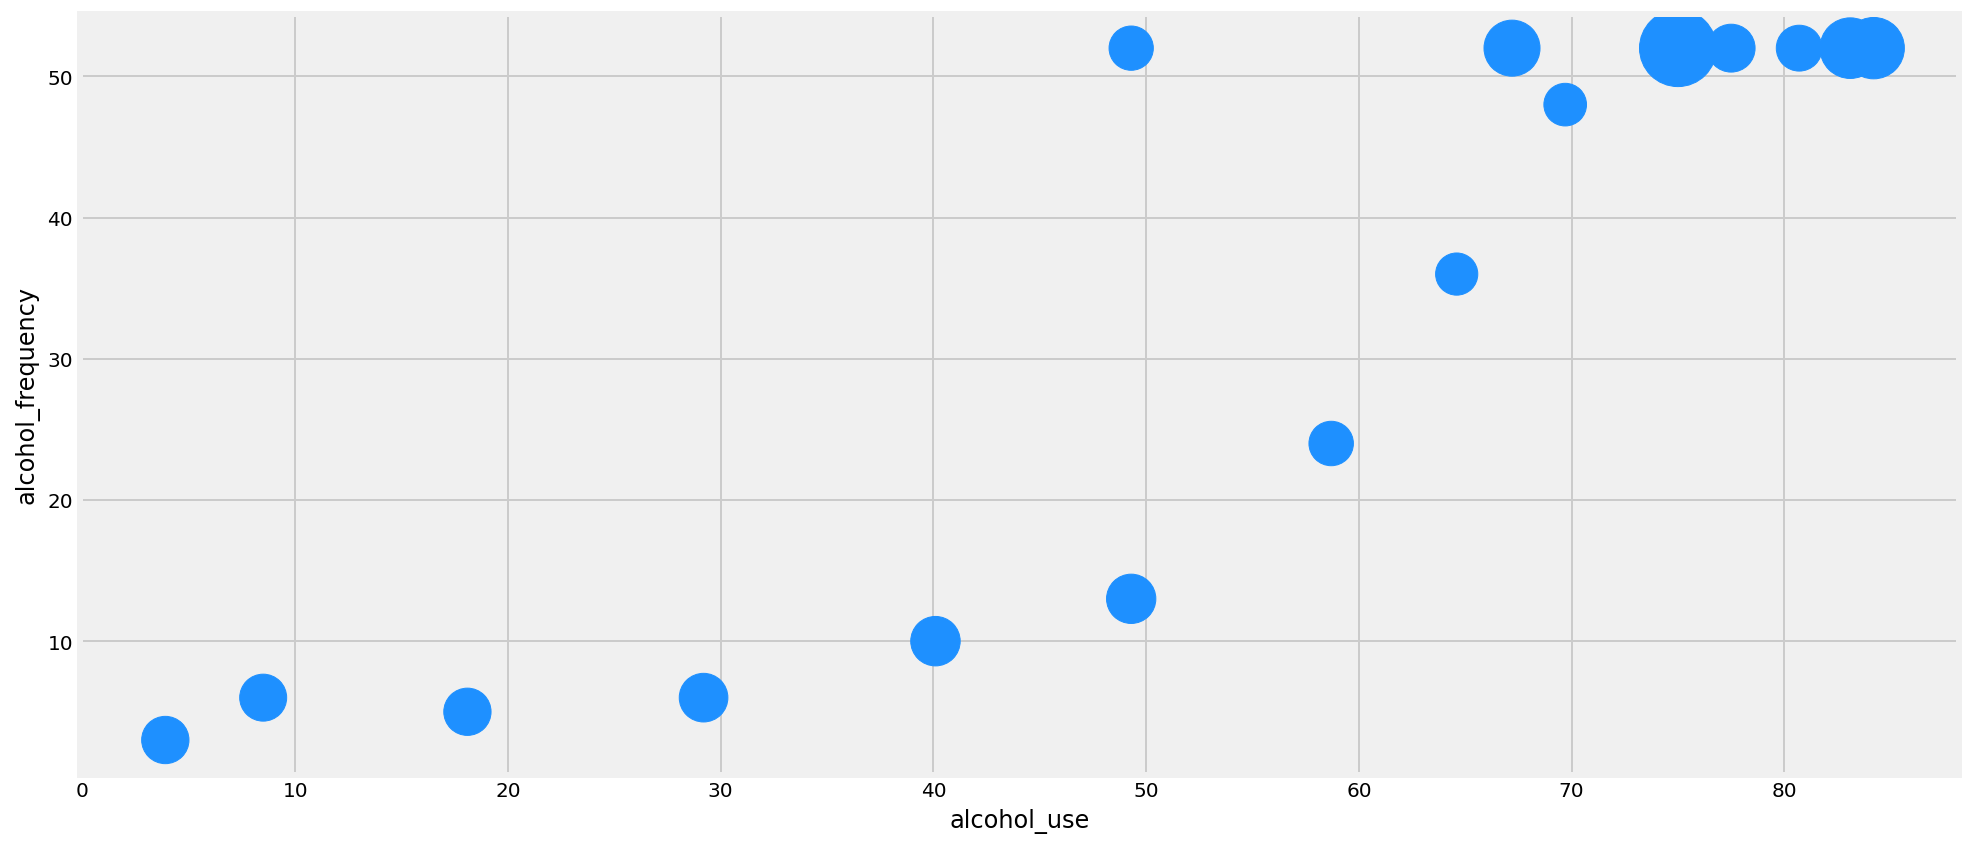

In [68]:
drugs.plot(x='alcohol_use', y='alcohol_frequency', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x/5 for x in drugs['n']])

Whereas this shows that by plotting use and frequency on separate axis does provide useful information.

here it can be summised that as the percentage of an age group increases alcohol consumption, so too does the frequency of consumption increase.

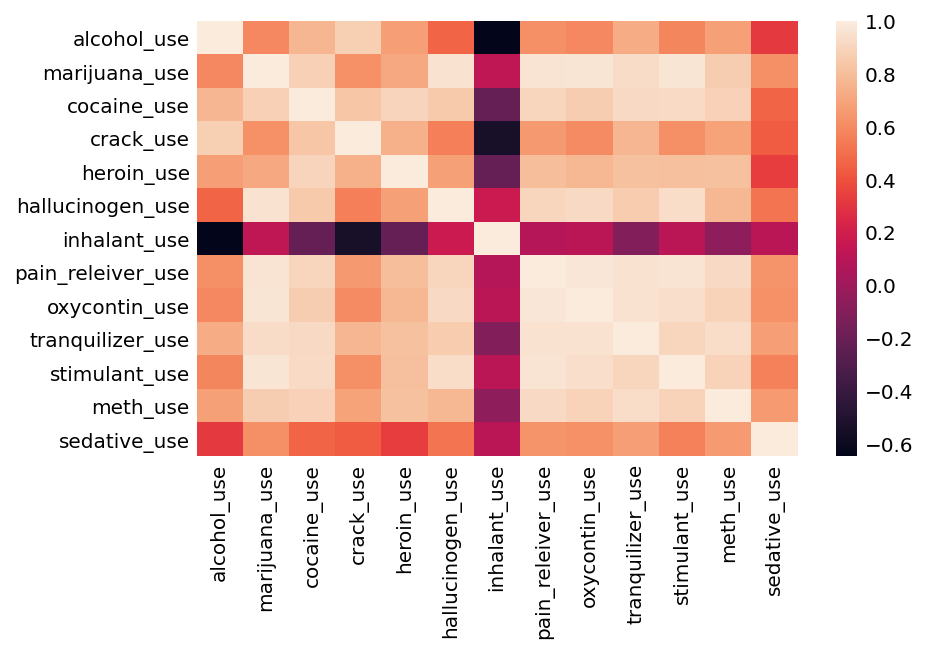

In [6]:
correlations = duse.corr()
sns.heatmap(correlations)

A correlation map is not of much use to me at this stage without knowing what I am trying to find a relation with, but it is interesting to note that Inhalant usage is the only drug to have a negative correlation with other drugs, and that the second half of all drugs seem to have higher correlation with the other drugs in the second half.

In [70]:
correlations

,alcohol_use,marijuana_use,cocaine_use,crack_use,heroin_use,hallucinogen_use,inhalant_use,pain_releiver_use,oxycontin_use,tranquilizer_use,stimulant_use,meth_use,sedative_use
alcohol_use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana_use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine_use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack_use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin_use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen_use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant_use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain_releiver_use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin_use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer_use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


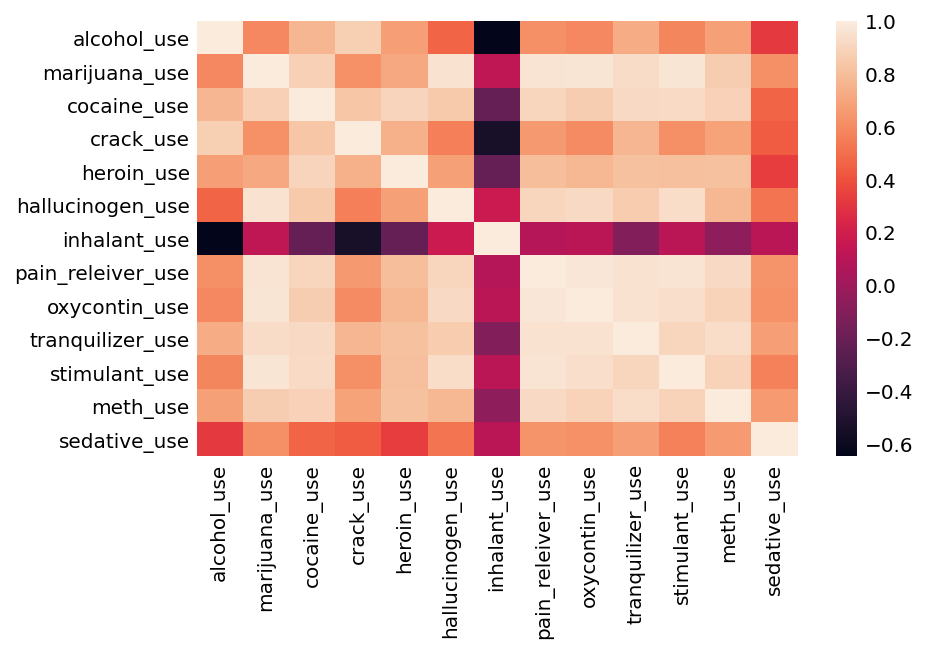

In [7]:
correlations2 = dfreq.corr()
sns.heatmap(correlations)

In [8]:
correlations2

,alcohol_frequency,marijuana_frequency,cocaine_frequency,crack_frequency,heroin_frequency,hallucinogen_frequency,inhalant_frequency,pain_releiver_frequency,oxycontin_frequency,tranquilizer_frequency,stimulant_frequency,meth_frequency,sedative_frequency
alcohol_frequency,1.000000,0.818769,0.391981,0.333935,0.381874,-0.174622,-0.305296,0.007087,0.119852,-0.415026,0.260304,0.253725,0.201423
marijuana_frequency,0.818769,1.000000,0.250348,0.113860,0.277175,-0.380430,-0.598028,-0.285292,0.040880,-0.591449,-0.069454,0.317099,0.048777
cocaine_frequency,0.391981,0.250348,1.000000,0.875558,0.149018,0.529790,0.369098,-0.107033,-0.236768,-0.144951,0.817772,0.172758,0.773808
crack_frequency,0.333935,0.113860,0.875558,1.000000,0.298192,0.737179,0.665838,-0.001609,-0.195650,-0.233501,0.903993,0.261224,0.611218
heroin_frequency,0.381874,0.277175,0.149018,0.298192,1.000000,-0.205455,0.048409,-0.041496,0.039502,-0.202417,0.204941,0.873618,-0.199142
hallucinogen_frequency,-0.174622,-0.380430,0.529790,0.737179,-0.205455,1.000000,0.846213,0.547363,0.032624,0.705734,-0.103980,-0.084470,0.533095
inhalant_frequency,-0.305296,-0.598028,0.369098,0.665838,0.048409,0.846213,1.000000,0.587035,0.226635,0.764857,0.083121,0.045934,0.380819
pain_releiver_frequency,0.007087,-0.285292,-0.107033,-0.001609,-0.041496,0.547363,0.587035,1.000000,0.561735,0.699282,0.324717,0.037693,-0.045213
oxycontin_frequency,0.119852,0.040880,-0.236768,-0.195650,0.039502,0.032624,0.226635,0.561735,1.000000,0.412133,-0.228278,-0.053704,-0.131597
tranquilizer_frequency,-0.415026,-0.591449,-0.144951,-0.233501,-0.202417,0.705734,0.764857,0.699282,0.412133,1.000000,-0.180415,-0.404670,-0.014524


In [44]:
Data = drugs[['n','alcohol_use','alcohol_frequency']]
Data

,n,alcohol_use,alcohol_frequency
age,,,
12,2798,3.9,3.0
13,2757,8.5,6.0
14,2792,18.1,5.0
15,2956,29.2,6.0
16,3058,40.1,10.0
17,3038,49.3,13.0
18,2469,58.7,24.0
19,2223,64.6,36.0
20,2271,69.7,48.0


In [45]:
Data2 = drugs[['n','heroin_use','heroin_frequency']].copy(deep=True)
Data2.dropna(inplace=True)
Data2

,n,heroin_use,heroin_frequency
age,,,
12,2798,0.1,35.5
14,2792,0.1,2.0
15,2956,0.2,1.0
16,3058,0.1,66.5
17,3038,0.1,64.0
18,2469,0.4,46.0
19,2223,0.5,180.0
20,2271,0.9,45.0
21,2354,0.6,30.0


In [ ]:
H0: the two samples are independent.
H1: there is a dependency between the samples.

In [21]:

# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = Data['alcohol_use']
data2 = Data['alcohol_frequency']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.898, p=0.000
Probably dependent


In [22]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = Data2['heroin_use']
data2 = Data2['heroin_frequency']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.122, p=0.653
Probably independent


In [23]:
stats.ttest_ind(Data['alcohol_use'],Data['alcohol_frequency'])

Ttest_indResult(statistic=2.65321305852782, pvalue=0.012308608873755542)

In [24]:
stats.ttest_ind(Data2['heroin_use'],Data2['heroin_frequency'])

Ttest_indResult(statistic=-4.1606651034537085, pvalue=0.0002451076466418979)

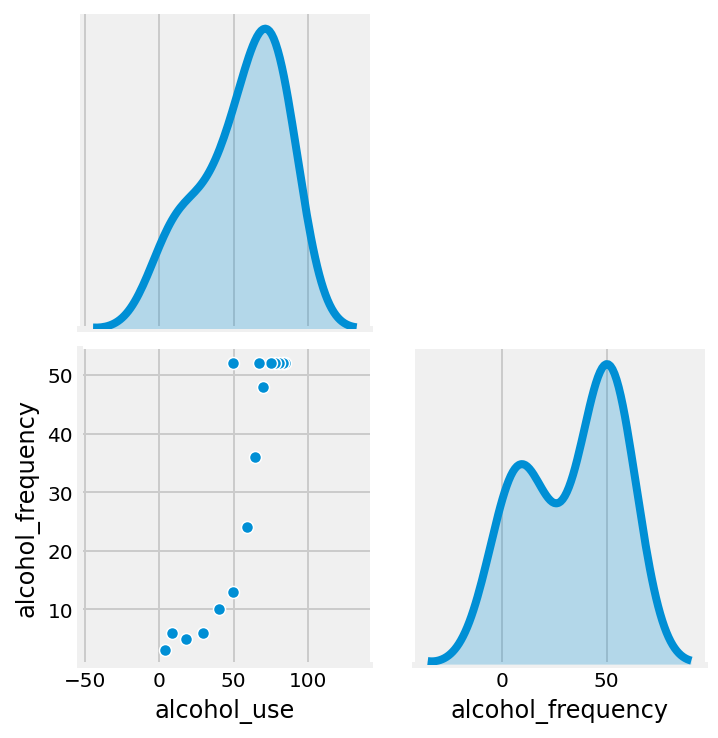

In [51]:
sns.pairplot(Data, diag_kind='kde', x_vars=['alcohol_use','alcohol_frequency'], y_vars=['alcohol_use','alcohol_frequency'],corner=True)

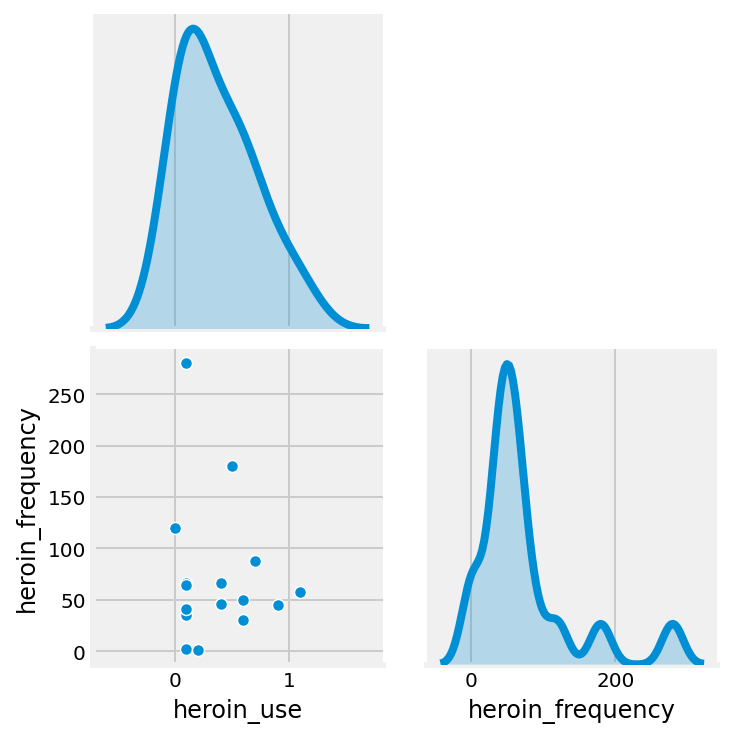

In [52]:
sns.pairplot(Data2, diag_kind='kde', x_vars=['heroin_use','heroin_frequency'], y_vars=['heroin_use','heroin_frequency'], corner=True)

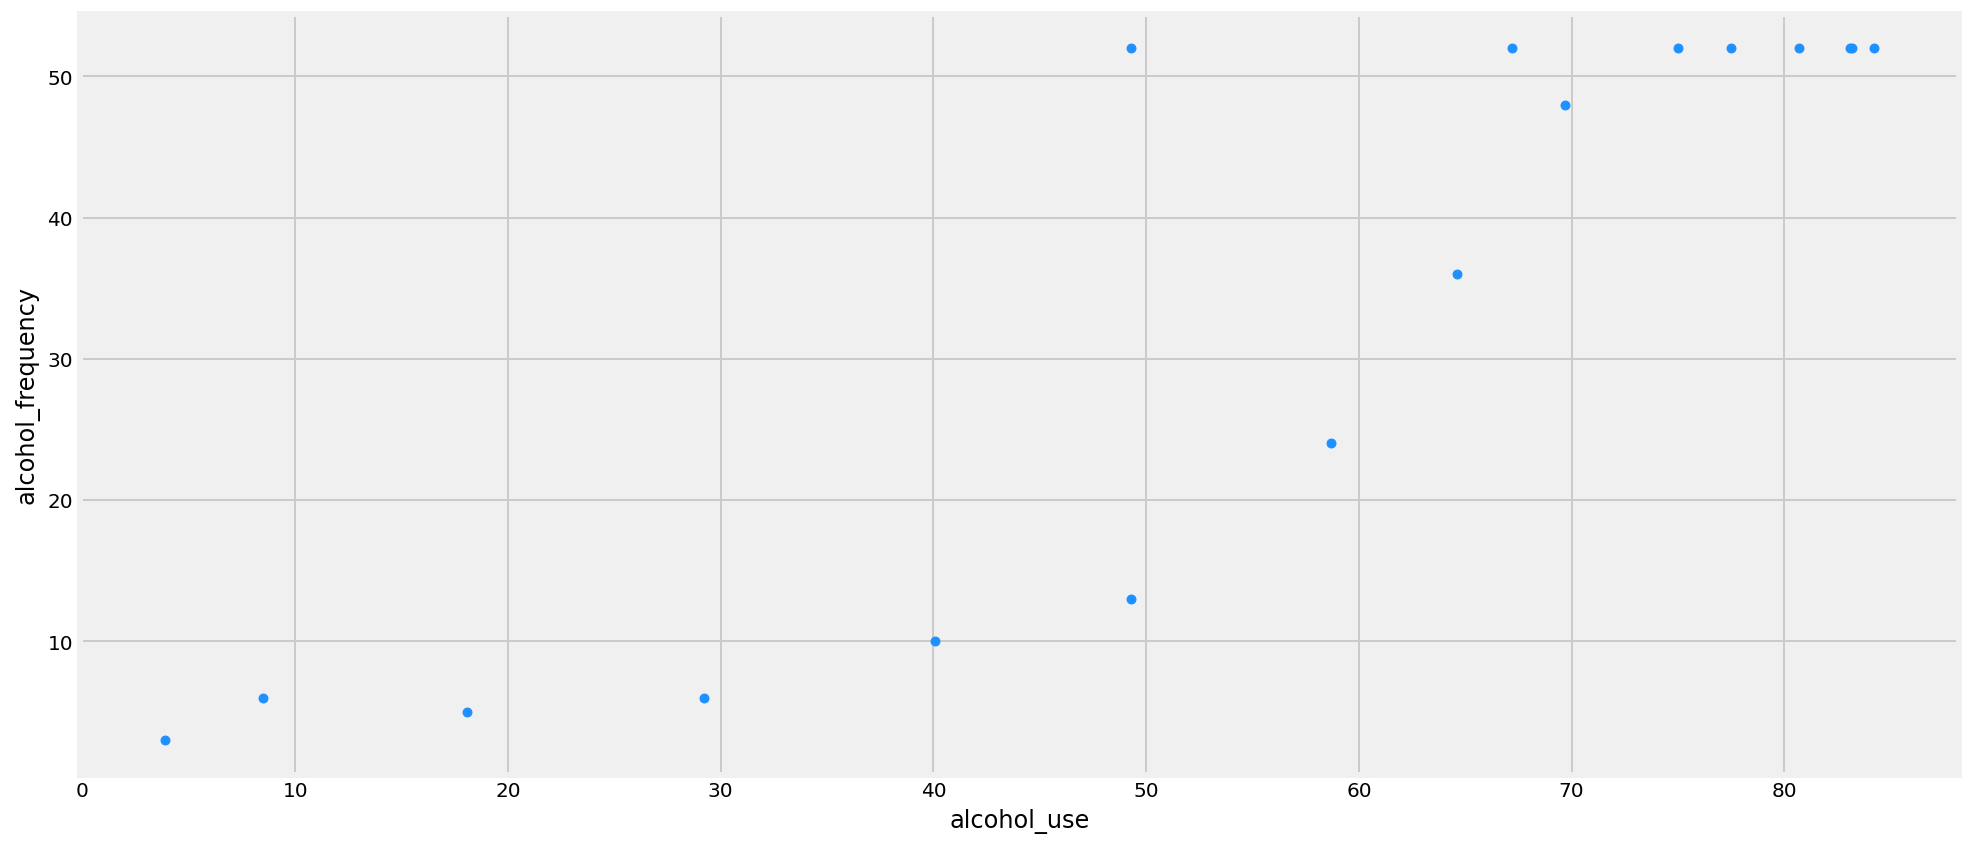

In [42]:
Data.plot(x='alcohol_use', y='alcohol_frequency', kind='scatter', 
           color='dodgerblue', figsize=(15,7))

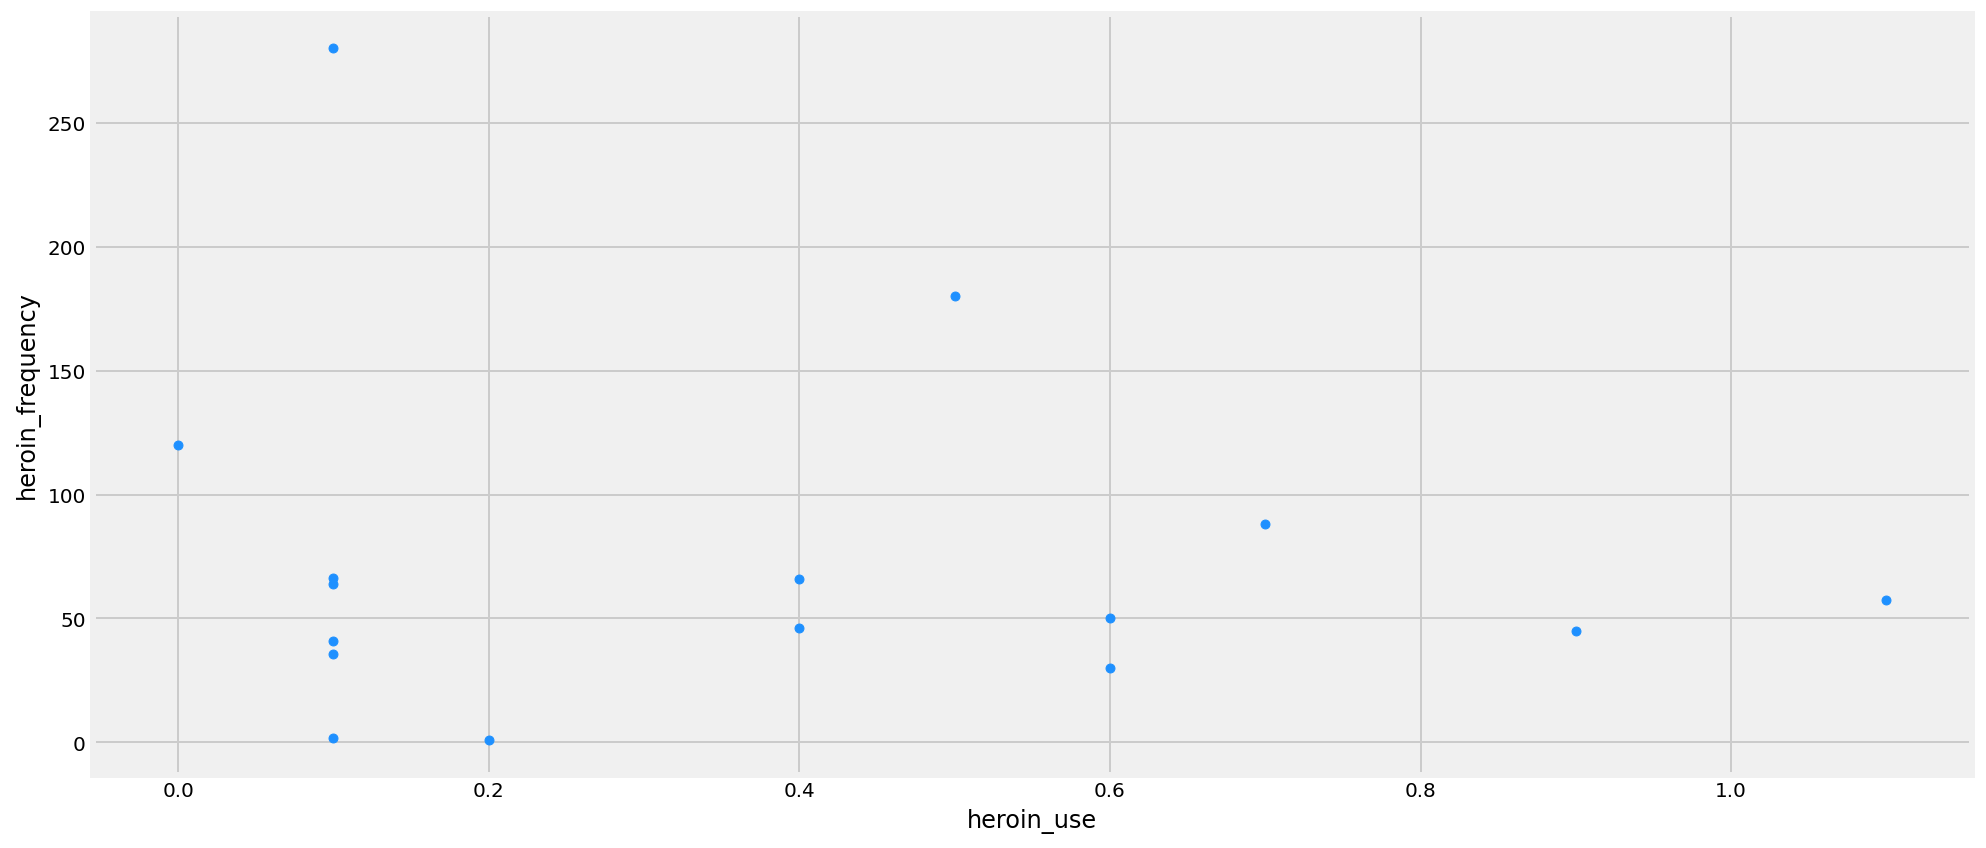

In [41]:
Data2.plot(x='heroin_use', y='heroin_frequency', kind='scatter', 
           color='dodgerblue', figsize=(15,7))

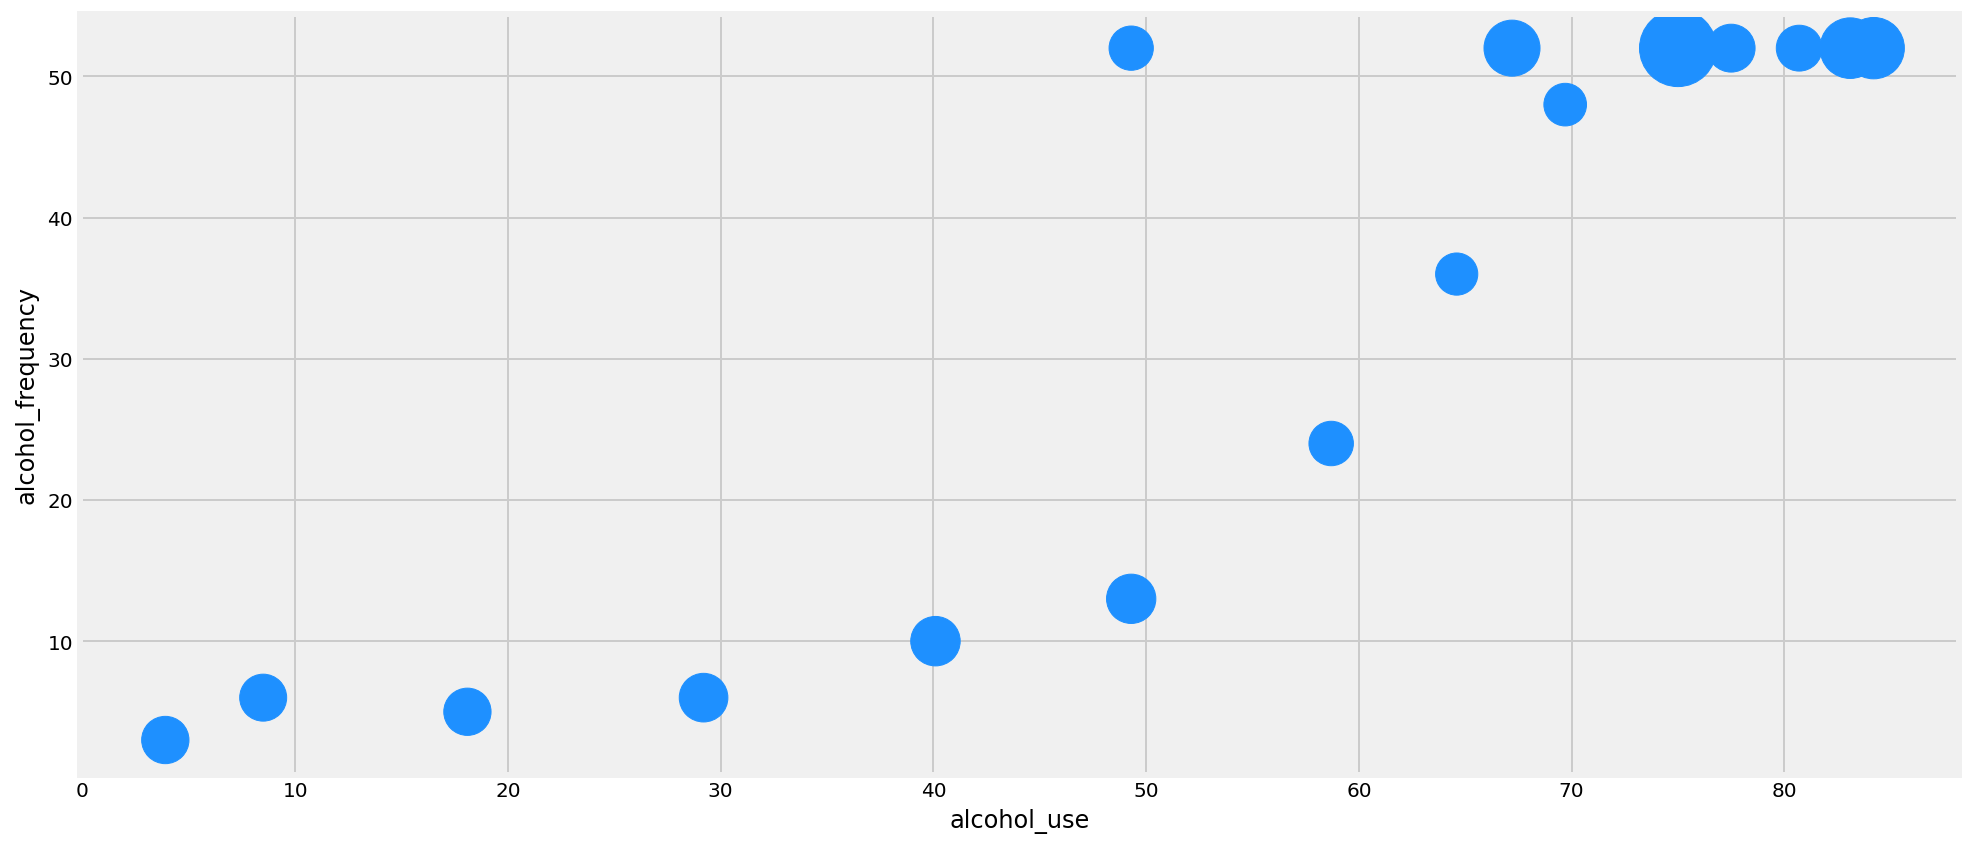

In [48]:
Data.plot(x='alcohol_use', y='alcohol_frequency', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x/5 for x in Data['n']])

KeyError: 'heroin_use'

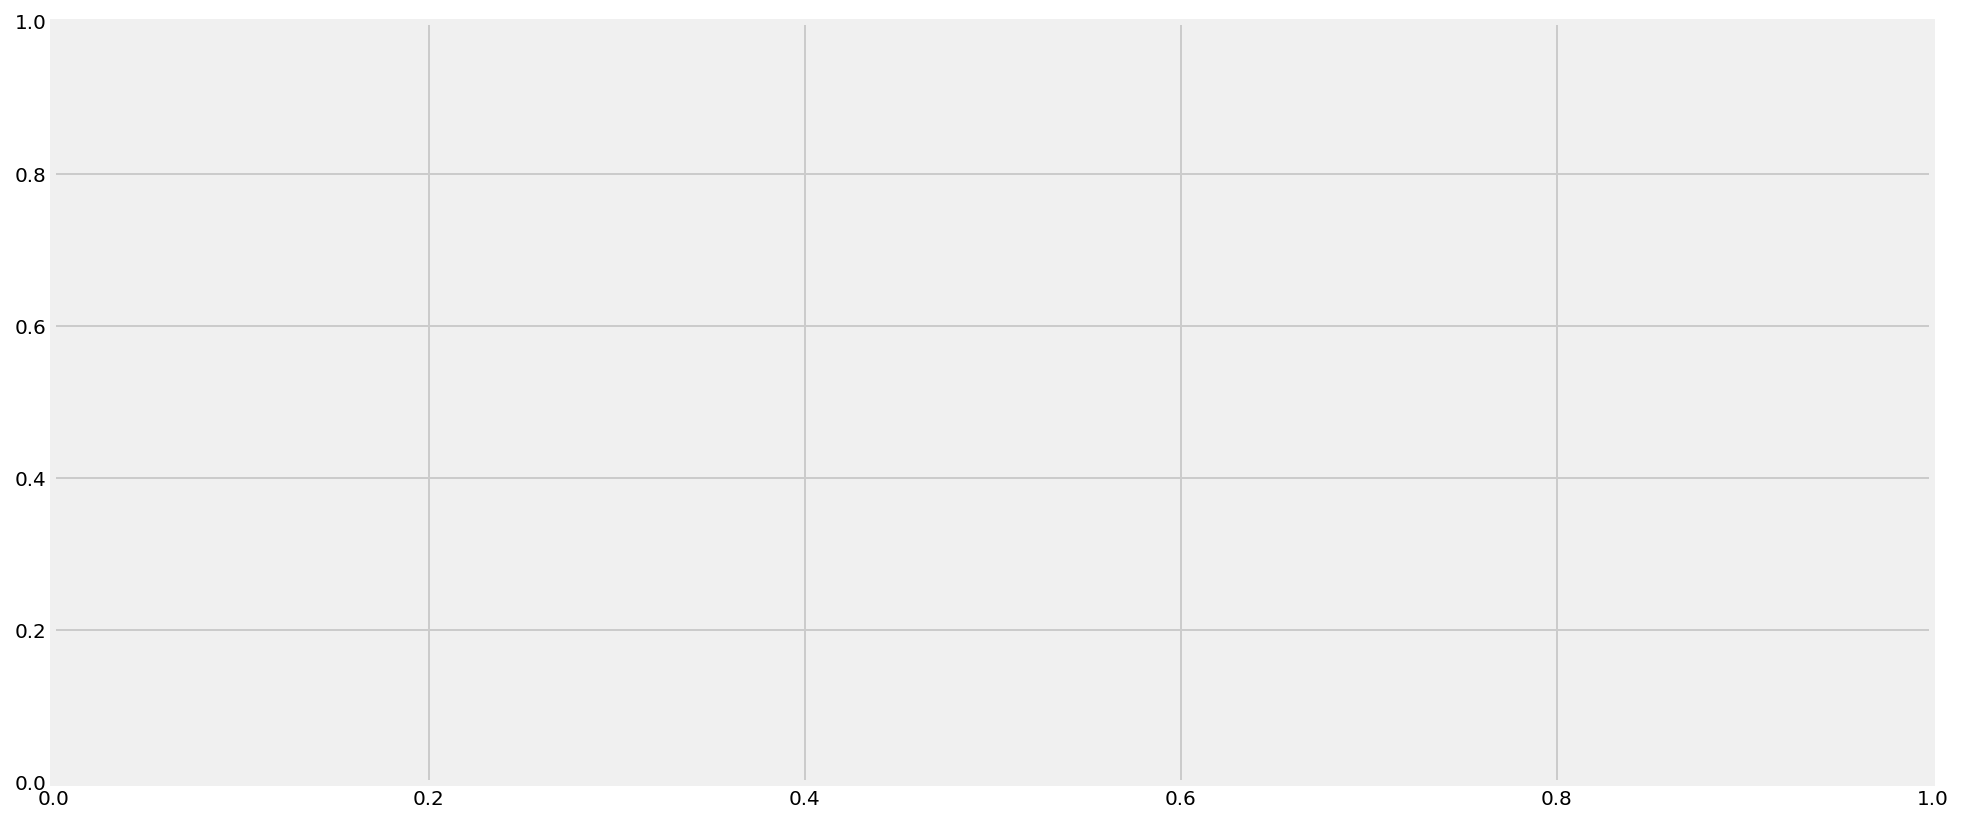

In [50]:
Data.plot(x='heroin_use', y='heroin_frequency', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x/5 for x in Data['n']])

# I HAVE JUST NOTICED THAT HEROIN HAS A PERCENTAGE ABOVE 100% I suspect it is because it is for an age group made of two ages.
This has made my calculations less accurate than I first thought.

#Marijuana vs alcohol
I wanted to test to see if there was any significant difference in the frequency usage of Alcohol in comparison to Marijuana.
Unfortunately, because this has already been taken as a median value, the data can not be considered highly accurate.
I will instead focus on the use percentage, which can be expanded back to the number of people using each drug by multiplying by the provided 'n' column if needed.

I will test if the number of users of Alcohol is significantly different to the number of users of Marijuana.

So Null Hypothesis: From the Data, there is no difference in the use of Marijuana, to the use of Alcohol.

H0: The number of Marijuana users is equal to the number of Alcohol users.

H1: The number of Marijuana users differs to the number of Alcohol users.


First we will calculate a t-statistic. The t-statistic is a measure of the degree to which our groups differ standardized by the variance of our measurements.

Secondly we will calculate a p-value. The p-value is a metric that indicates a probability that our measured difference was due to random chance in the sampling of subjects.


In [74]:
Alcohol_Users = np.array(Data['alcohol_use'])
Marijuana_Users = np.array(Data['marijuana_use'])
print(np.mean(Alcohol_Users))
print(np.mean(Marijuana_Users))
print(np.mean(Marijuana_Users)-np.mean(Alcohol_Users))

55.42941176470588
18.923529411764704
-36.50588235294118


Taking Alcohol Users as the Null, means that I am taking Alcohol to be the assumed true mean in the case of my experiment.

In [ ]:
def sample_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    dev1 = np.sum([(x - np.mean(sample1))**2 for x in sample1])
    dev2 = np.sum([(x - np.mean(sample2))**2 for x in sample2])
    s2 = float(dev1 + dev2) / (n1 + n2 - 2)
    return s2

In [ ]:
def t_statistic(expr, ctrl):
    s2 = sample_variance(expr, ctrl)
    mean1 = np.mean(expr)
    mean2 = np.mean(ctrl)
    std = np.sqrt(s2 * (1./len(expr) + 1./len(ctrl)))
    return float(mean1 - mean2) / std

In [79]:
mean_difference = np.mean(Marijuana_Users)-np.mean(Alcohol_Users)
t_stat = t_statistic(Marijuana_Users, Alcohol_Users)

NameError: name 't_statistic' is not defined

In [77]:
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom: n1 + n2 - 2
ypoints = stats.t.pdf(xpoints, (sum(Alcohol_Users)+sum(Marijuana_Users)-2), 0, 1)

NameError: name 't_stat' is not defined

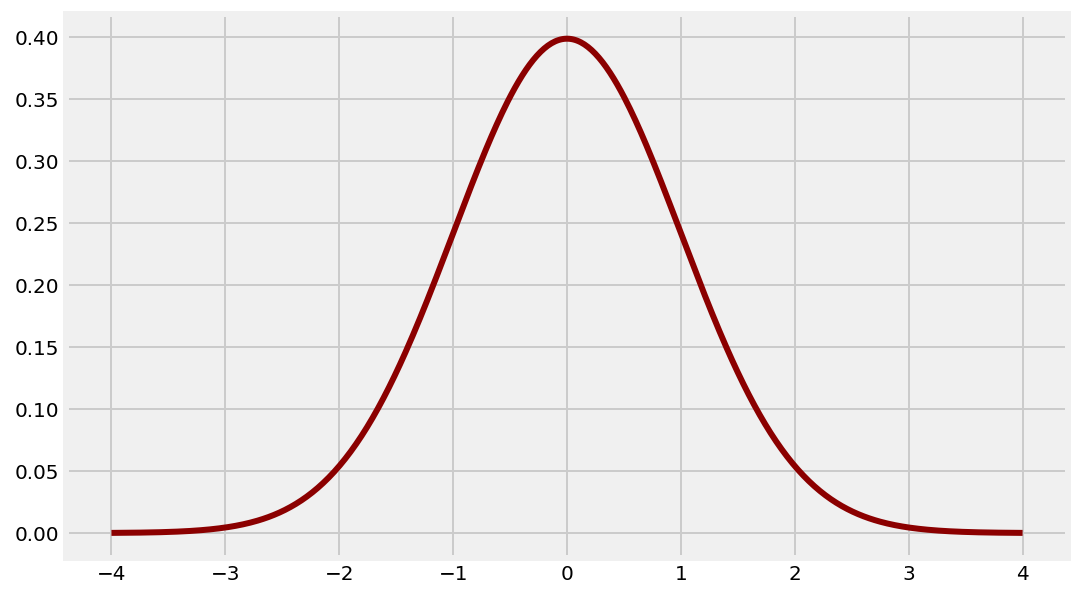

In [78]:
# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_stat, color='black', linestyle='--', lw=5)

In [57]:
def generate_group(mean, std, n):
    return np.random.normal(mean, std, size=n)

In [58]:
g1 = generate_group(np.mean(Alcohol_Users),np.std(Alcohol_Users), 500)
g2 = generate_group(np.mean(Marijuana_Users),np.std(Marijuana_Users), 500)

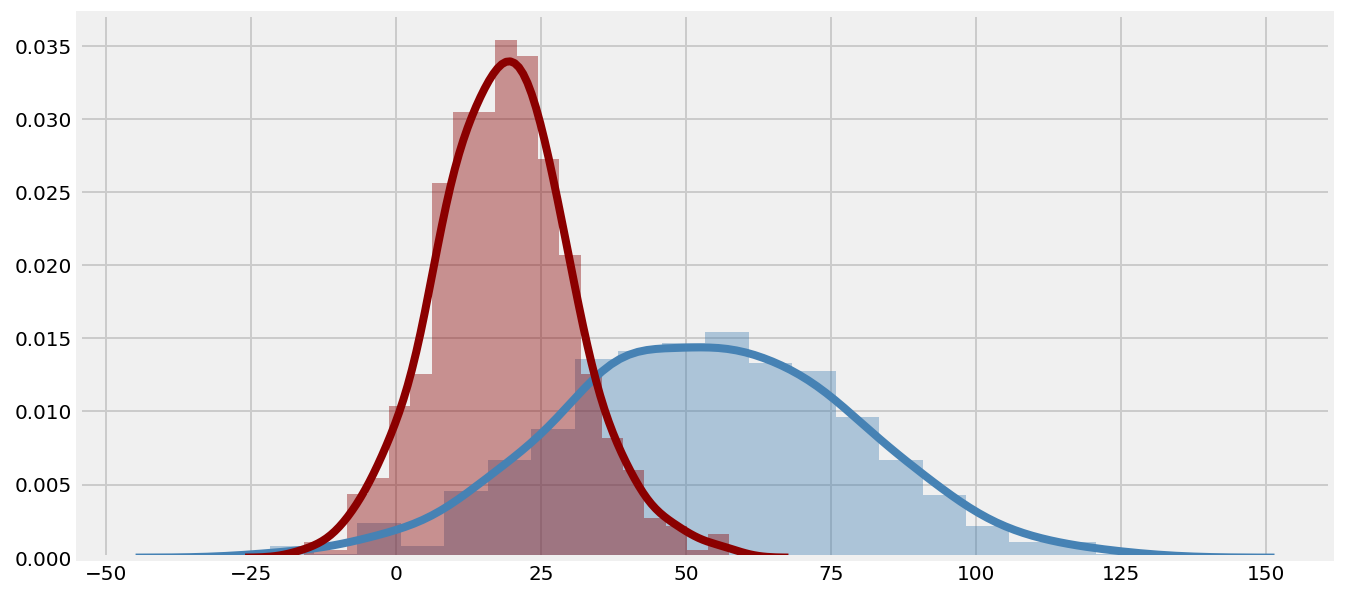

In [59]:
# Create the matplotlib figure and get the axis:
# initialize a matplotlib figure
fig = plt.figure(figsize=(10,5))

# get the current axis out of the figure
ax = fig.gca()

# create a distribution plot with seaborn's distplot, passing in the axis and also returning it:
# first plot group 1:
ax = sns.distplot(g1, bins=20, color='steelblue', ax=ax)

# create another distribution on the same axis for group 2:
sns.distplot(g2, bins=20, color='darkred', ax=ax)

In [61]:
stats.ttest_ind(Marijuana_Users, Alcohol_Users)

Ttest_indResult(statistic=-5.116246810580653, pvalue=1.4171567091021532e-05)

The p-value result found from these analysis show that we can say that there is no difference in the number of Marijuana users to the number of alcohol users over all.

It could be infered that the reason the data collected said that Alcohol users were more plentiful is because people are more comfortable openly talking about alcohol usage in comparison to Marijuana use.